In [1]:
import pandas as pd
df=pd.read_csv(r"C:\Users\arulkumar\Desktop\MLGuvi\Guvi_final\Influencer.csv")
df

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,\ncristiano,92,485.2m,8.7m,3.4k,0.013,6.3m,29.1b,Spain
1,2,kyliejenner,91,370.7m,8.2m,7.0k,0.014,5.0m,57.4b,United States
2,3,\nleomessi,90,363.9m,6.7m,915,0.010,3.5m,6.1b,NaN
3,4,\nselenagomez,93,348.8m,6.1m,1.9k,0.005,1.7m,11.4b,United States
4,5,\ntherock,91,339.4m,1.8m,6.8k,0.003,932.0k,12.6b,United States
...,...,...,...,...,...,...,...,...,...,...
195,196,\nkhabib_nurmagomedov,63,33.6m,680.6k,4.6k,0.009,305.7k,3.1b,Russia
196,197,\ndanbilzerian,84,33.6m,2.2m,1.4k,0.064,2.1m,3.0b,Canada
197,198,\nraisa6690,80,33.6m,227.8k,4.2k,0.003,103.2k,955.9m,Indonesia
198,199,\nluansantana,79,33.5m,193.3k,865,0.003,82.6k,167.2m,Brazil


In [2]:
df.isna().sum()

Rank                    0
Channel Info            0
Influence Score         0
Followers               0
Avg. Likes              0
Posts                   0
60-Day Eng Rate         0
New Post Avg. Likes     0
Total Likes             0
Country Or Region      63
dtype: int64

In [3]:
df["Country Or Region"].mode()

0    United States
Name: Country Or Region, dtype: object

In [4]:
df["Country Or Region"]=df["Country Or Region"].fillna("United States")

In [5]:
df.isna().sum()

Rank                   0
Channel Info           0
Influence Score        0
Followers              0
Avg. Likes             0
Posts                  0
60-Day Eng Rate        0
New Post Avg. Likes    0
Total Likes            0
Country Or Region      0
dtype: int64

In [6]:
df["Channel Info"]=df["Channel Info"].str.lstrip("\n")

In [7]:
df

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,cristiano,92,485.2m,8.7m,3.4k,0.013,6.3m,29.1b,Spain
1,2,kyliejenner,91,370.7m,8.2m,7.0k,0.014,5.0m,57.4b,United States
2,3,leomessi,90,363.9m,6.7m,915,0.010,3.5m,6.1b,United States
3,4,selenagomez,93,348.8m,6.1m,1.9k,0.005,1.7m,11.4b,United States
4,5,therock,91,339.4m,1.8m,6.8k,0.003,932.0k,12.6b,United States
...,...,...,...,...,...,...,...,...,...,...
195,196,khabib_nurmagomedov,63,33.6m,680.6k,4.6k,0.009,305.7k,3.1b,Russia
196,197,danbilzerian,84,33.6m,2.2m,1.4k,0.064,2.1m,3.0b,Canada
197,198,raisa6690,80,33.6m,227.8k,4.2k,0.003,103.2k,955.9m,Indonesia
198,199,luansantana,79,33.5m,193.3k,865,0.003,82.6k,167.2m,Brazil


In [8]:
#CONVERTING m,b,k to million,billion and thousand
def converter(x):
    if 'm' in x:
      
        t1=x.replace("m","")
        a=pd.to_numeric(t1)
        return a*1000000
        
    elif 'b' in x:
        t1=x.replace("b","")
        a=pd.to_numeric(t1)
        return a*1000000000
    elif 'k' in x:
        
        t1=x.replace("k","")
        a=pd.to_numeric(t1)
        return a*1000
    else:
        return x

In [9]:
df.shape

(200, 10)

In [10]:
df["Followers"]=df["Followers"].astype('str')
df["Avg. Likes"]=df["Avg. Likes"].astype('str')
df["Posts"]=df["Posts"].astype('str')
df["New Post Avg. Likes"]=df["New Post Avg. Likes"].astype('str')
df["Total Likes"]=df["Total Likes"].astype('str')

In [11]:
df.dtypes

Rank                     int64
Channel Info            object
Influence Score          int64
Followers               object
Avg. Likes              object
Posts                   object
60-Day Eng Rate        float64
New Post Avg. Likes     object
Total Likes             object
Country Or Region       object
dtype: object

In [12]:
#Applying the function
df["Followers"]=df["Followers"].apply(converter)
df["Avg. Likes"]=df["Avg. Likes"].apply(converter)
df["Posts"]=df["Posts"].apply(converter)
df["New Post Avg. Likes"]=df["New Post Avg. Likes"].apply(converter)
df["Total Likes"]=df["Total Likes"].apply(converter)

In [13]:
df.dtypes

Rank                     int64
Channel Info            object
Influence Score          int64
Followers              float64
Avg. Likes             float64
Posts                   object
60-Day Eng Rate        float64
New Post Avg. Likes     object
Total Likes            float64
Country Or Region       object
dtype: object

### Q1:Are there any correlated features in the given dataset? If yes, state the correlation coefficient of the pair of features which are highly correlated.

In [14]:
x_train=df.drop(["Country Or Region","Channel Info"],axis=1)
corr_matrix = x_train.corr()
# Take absolute values of correlated coefficients
corr_matrix = corr_matrix.abs().unstack()
corr_matrix = corr_matrix.sort_values(ascending=False)
# Take only features with correlation above threshold of 0.8
corr_matrix = corr_matrix[corr_matrix >= 0.5]
corr_matrix = corr_matrix[corr_matrix < 1]
corr_matrix = pd.DataFrame(corr_matrix).reset_index()
corr_matrix.columns = ['feature1', 'feature2', 'Correlation']
corr_matrix

C:\Users\arulkumar\AppData\Local\Temp\ipykernel_1968\3288054279.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = x_train.corr()


,feature1,feature2,Correlation
0,Avg. Likes,60-Day Eng Rate,0.789359
1,60-Day Eng Rate,Avg. Likes,0.789359
2,Followers,Rank,0.698193
3,Rank,Followers,0.698193
4,Total Likes,Followers,0.667546
5,Followers,Total Likes,0.667546


###### ANS:New Post Avg likes & Avg like has correlation is 0.892784

### Q2:What is the frequency distribution of the following features?
○ Influence Score
○ Followers
○ Posts

(array([161.,  10.,   8.,   5.,   6.,   3.,   4.,   2.,   0.,   1.]),
 array([3.3400e+07, 7.8580e+07, 1.2376e+08, 1.6894e+08, 2.1412e+08,
        2.5930e+08, 3.0448e+08, 3.4966e+08, 3.9484e+08, 4.4002e+08,
        4.8520e+08]),
 <BarContainer object of 10 artists>)

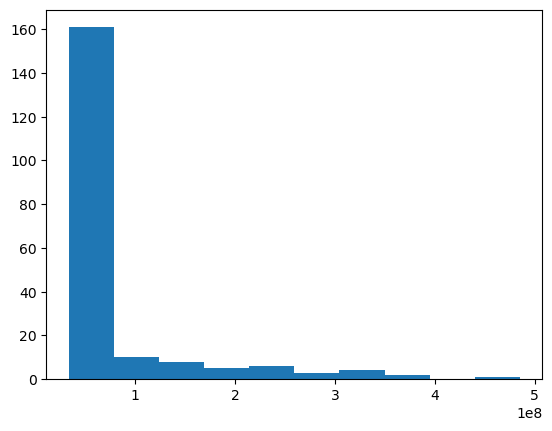

In [15]:
#FOLLOWERS
import matplotlib.pyplot as plt
plt.hist(df["Followers"])

(array([  1.,   0.,   3.,   1.,   1.,   2.,   3.,  25., 107.,  57.]),
 array([22. , 29.1, 36.2, 43.3, 50.4, 57.5, 64.6, 71.7, 78.8, 85.9, 93. ]),
 <BarContainer object of 10 artists>)

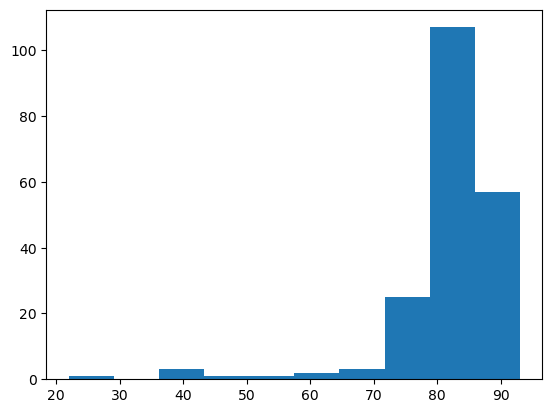

In [16]:
#INFLUENCE SCORE
plt.hist(df["Influence Score"])

In [17]:
df["Posts"]=pd.to_numeric(df["Posts"])

(array([84., 44., 22., 13., 11., 22.,  2.,  1.,  0.,  1.]),
 array([   20.,  1708.,  3396.,  5084.,  6772.,  8460., 10148., 11836.,
        13524., 15212., 16900.]),
 <BarContainer object of 10 artists>)

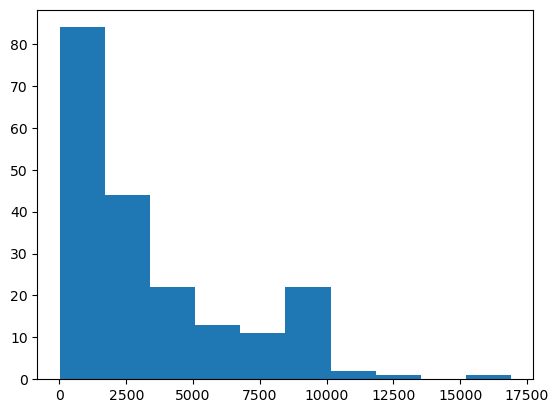

In [18]:
#POSTS
plt.hist(df["Posts"])

### Q3:Which country houses the highest number of Instagram Influencers? Please show the count of Instagram influencers in different countries using barchart.

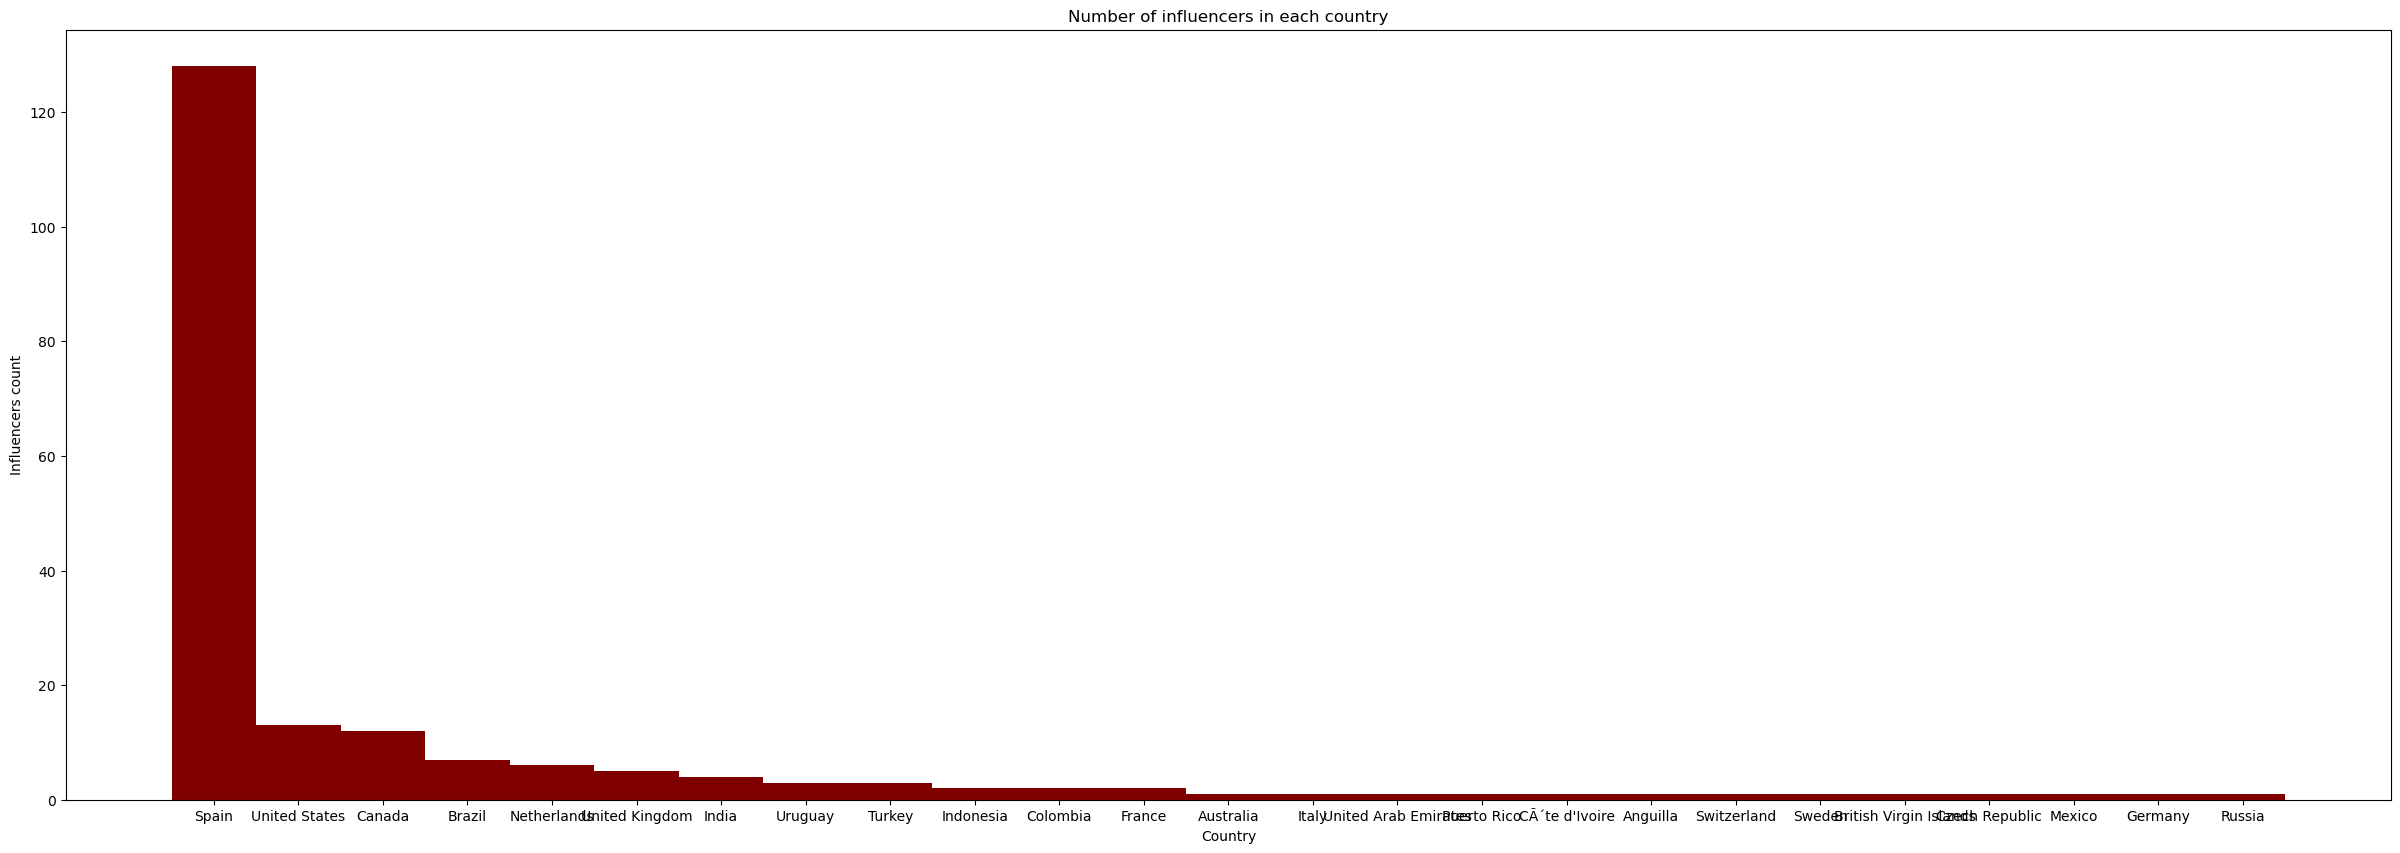

In [19]:
fig = plt.figure(figsize =(30, 10))
plt.bar(df["Country Or Region"].unique(),df["Country Or Region"].value_counts(),color ='maroon',width = 1)

plt.xlabel("Country")
plt.ylabel("Influencers count")
plt.title("Number of influencers in each country")
plt.show()

#### Spain has the highest number of influencers

### Q4:Who are the top 10 influencers in the given dataset based on the following features
● Followers
● Average likes
● Total Likes

In [36]:
df2= df.sort_values(by=['Followers'],ascending=False).head(10)
df2

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,cristiano,92,485200000.0,8700000.0,3400.0,0.013,6300000.0,2.910000e+10,Spain
1,2,kyliejenner,91,370700000.0,8200000.0,7000.0,0.014,5000000.0,5.740000e+10,United States
2,3,leomessi,90,363900000.0,6700000.0,915.0,0.010,3500000.0,6.100000e+09,United States
3,4,selenagomez,93,348800000.0,6100000.0,1900.0,0.005,1700000.0,1.140000e+10,United States
4,5,therock,91,339400000.0,1800000.0,6800.0,0.003,932000.0,1.260000e+10,United States
5,6,arianagrande,92,333000000.0,3700000.0,5000.0,0.009,3100000.0,1.850000e+10,United States
6,7,kimkardashian,91,330700000.0,3500000.0,5700.0,0.005,1700000.0,1.980000e+10,United States
7,8,beyonce,92,276100000.0,3600000.0,2000.0,0.008,2200000.0,7.300000e+09,United States
8,9,khloekardashian,89,273900000.0,2400000.0,4100.0,0.002,404700.0,9.800000e+09,United States
9,10,justinbieber,91,260000000.0,1900000.0,7400.0,0.007,1700000.0,1.400000e+10,Canada


Top 10 Influencers based on Followers

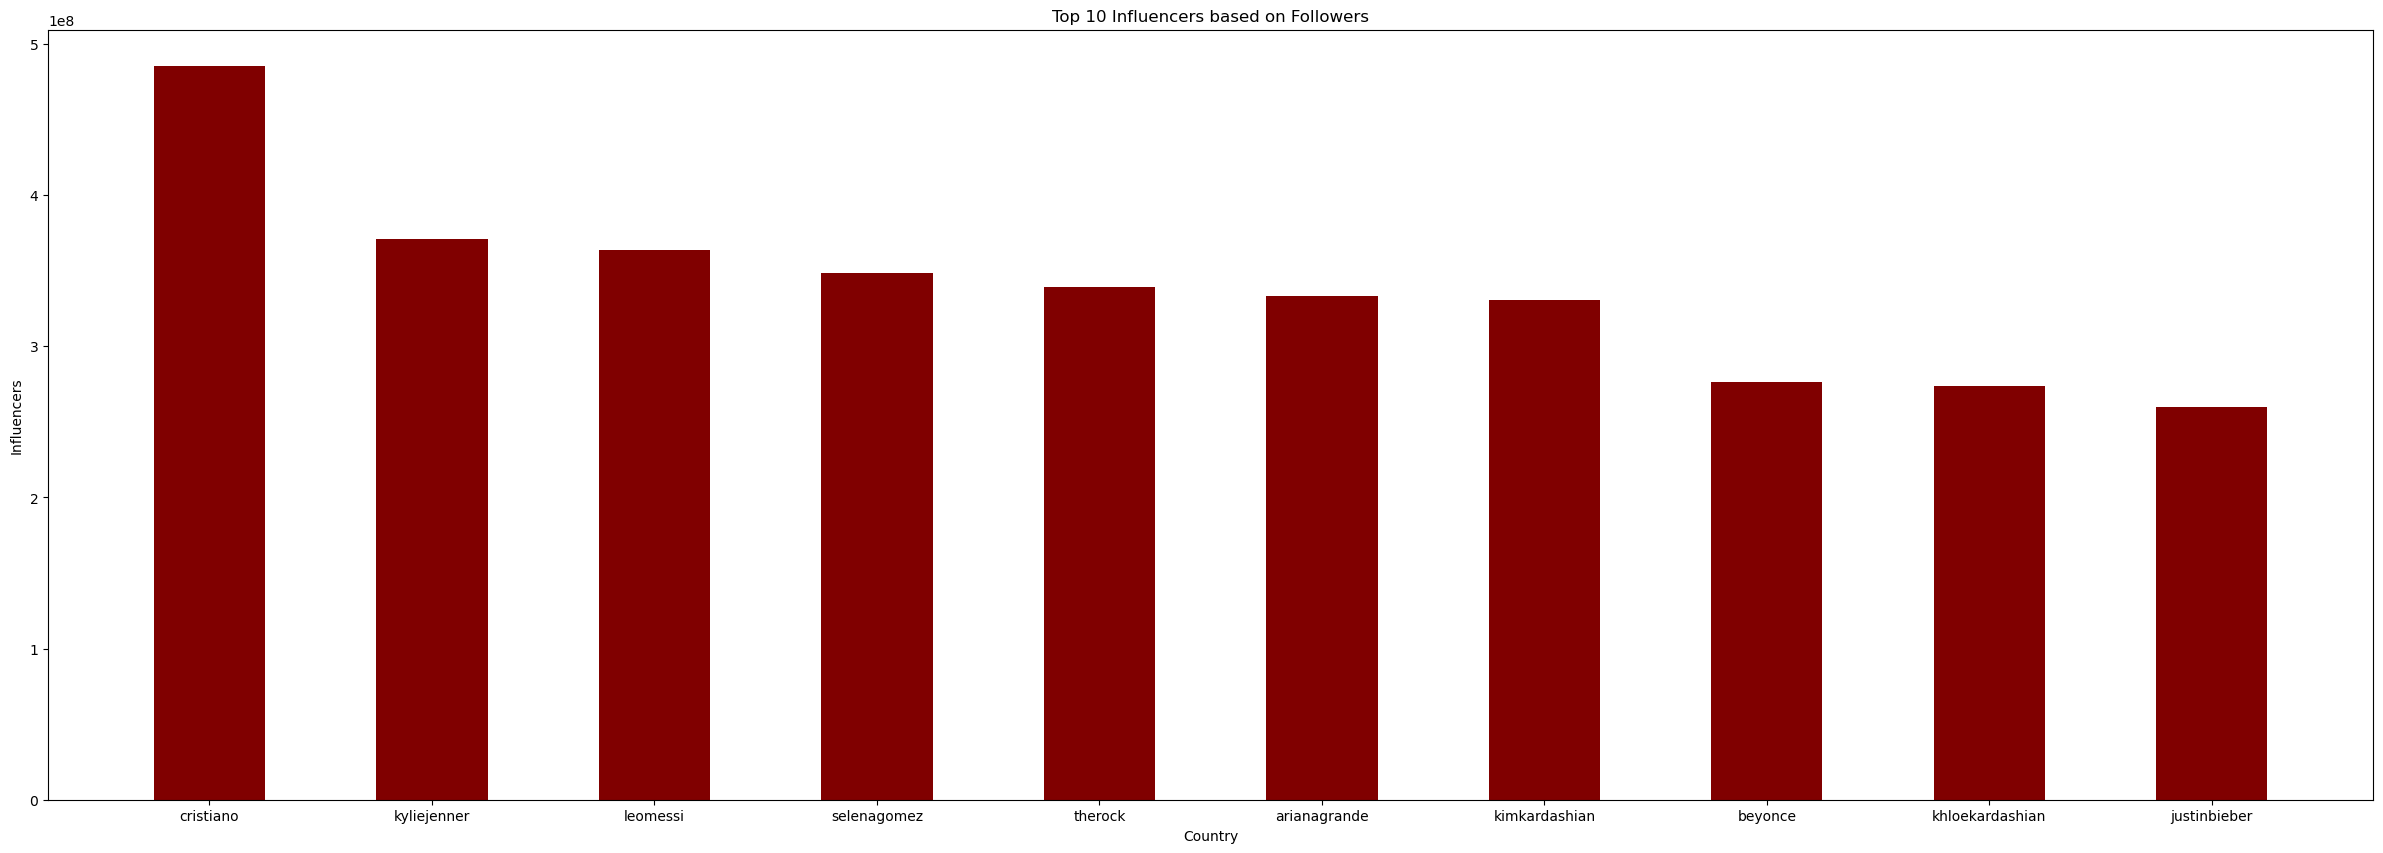

In [21]:
fig = plt.figure(figsize =(30, 10))
plt.bar(df2["Channel Info"],df2["Followers"],color ='maroon',width = 0.5)
plt.xlabel("Country")
plt.ylabel("Influencers")
plt.title("Top 10 Influencers based on Followers")
plt.show()

In [22]:
df3= df.sort_values(by=['Avg. Likes'],ascending=False).head(10)
df3

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
96,97,thv,83,51700000.0,15400000.0,69.0,0.250,12900000.0,1.100000e+09,United States
131,132,j.m,83,44200000.0,14400000.0,28.0,0.228,10000000.0,4.021000e+08,United States
165,166,rkive,83,38400000.0,10600000.0,115.0,0.171,6500000.0,1.200000e+09,United States
0,1,cristiano,92,485200000.0,8700000.0,3400.0,0.013,6300000.0,2.910000e+10,Spain
32,33,billieeilish,73,106400000.0,8400000.0,710.0,0.047,4900000.0,6.000000e+09,United States
1,2,kyliejenner,91,370700000.0,8200000.0,7000.0,0.014,5000000.0,5.740000e+10,United States
2,3,leomessi,90,363900000.0,6700000.0,915.0,0.010,3500000.0,6.100000e+09,United States
3,4,selenagomez,93,348800000.0,6100000.0,1900.0,0.005,1700000.0,1.140000e+10,United States
38,39,lalalalisa_m,70,82600000.0,6000000.0,893.0,0.088,7200000.0,5.300000e+09,United States
22,23,zendaya,87,153300000.0,5900000.0,3500.0,0.049,7500000.0,2.080000e+10,United States


# Top 10 Influencers based on Average Likes

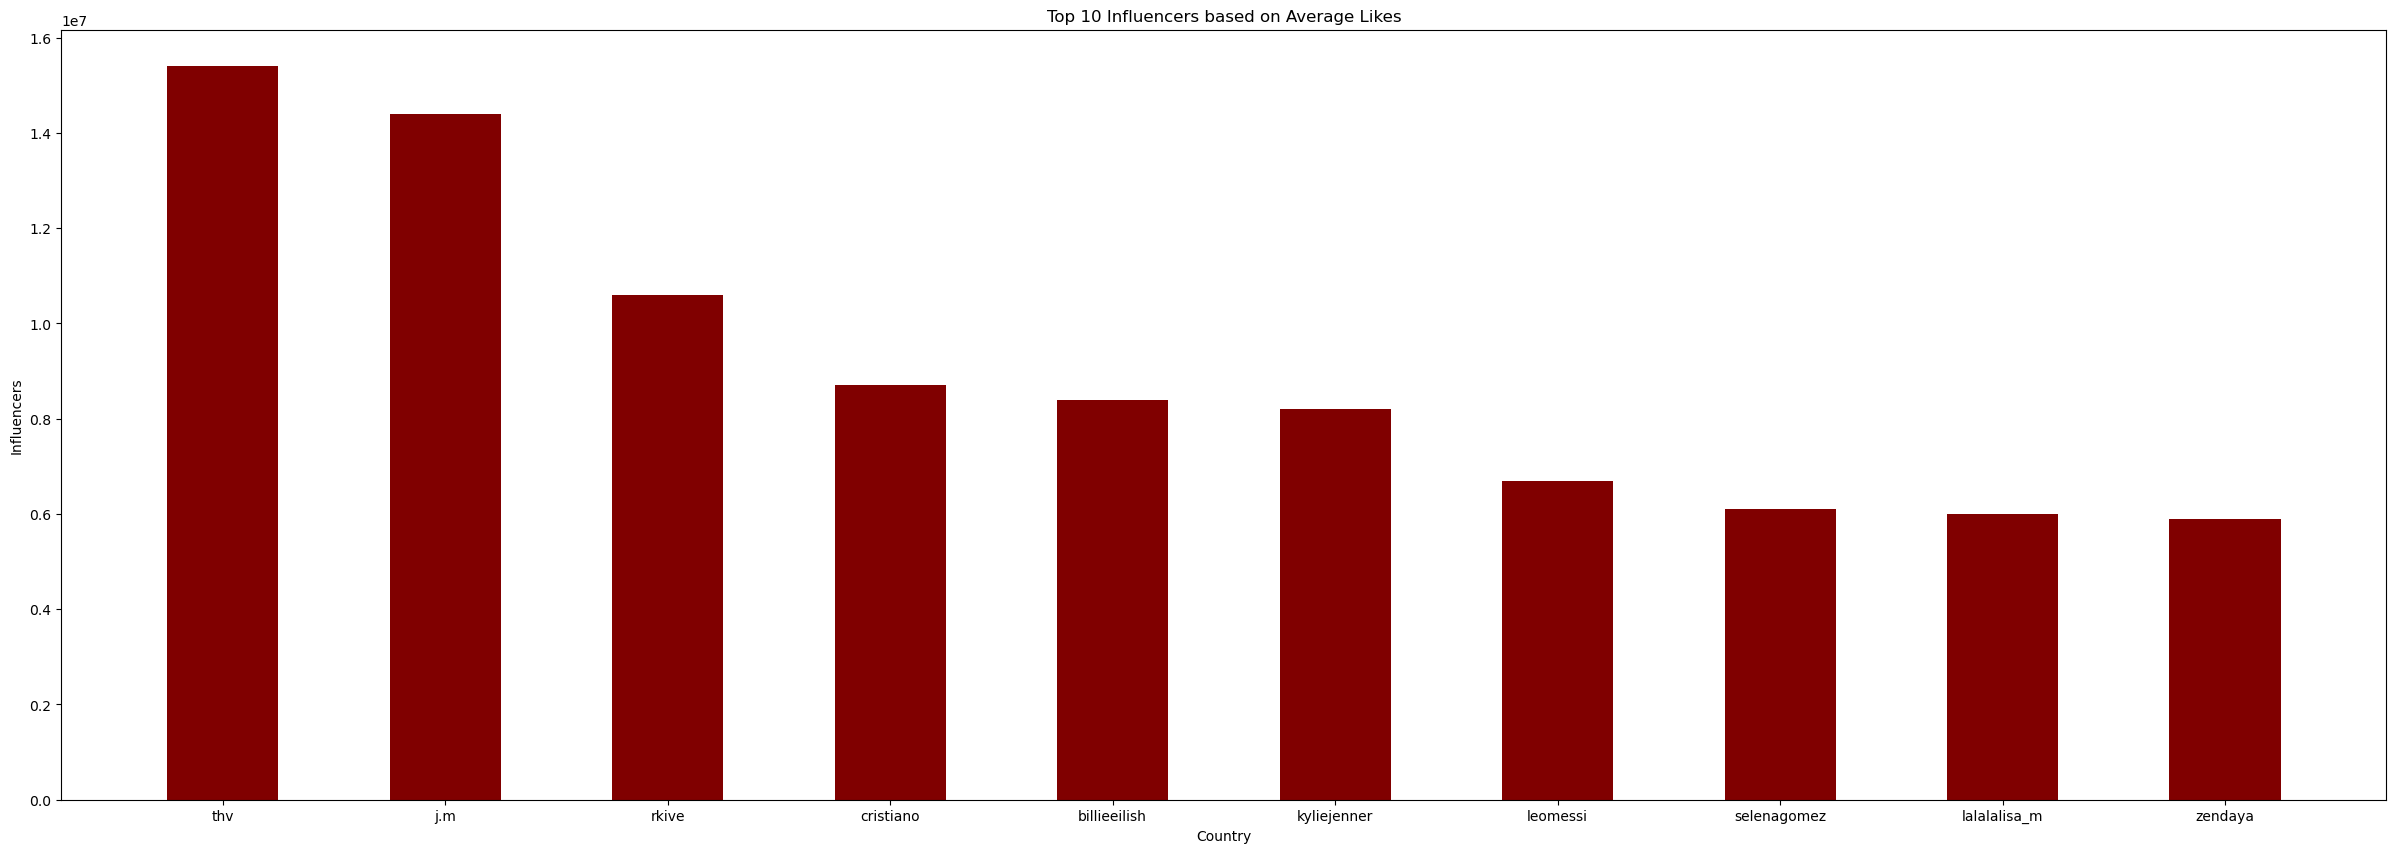

In [24]:
fig = plt.figure(figsize =(30, 10))
plt.bar(df3["Channel Info"],df3["Avg. Likes"],color ='maroon',width = 0.5)
plt.xlabel("Country")
plt.ylabel("Influencers")
plt.title("Top 10 Influencers based on Average Likes")
plt.show()

In [25]:
df4= df.sort_values(by=['Total Likes'],ascending=False).head(10)
df4

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
1,2,kyliejenner,91,370700000.0,8200000.0,7000.0,0.014,5000000.0,5.740000e+10,United States
0,1,cristiano,92,485200000.0,8700000.0,3400.0,0.013,6300000.0,2.910000e+10,Spain
22,23,zendaya,87,153300000.0,5900000.0,3500.0,0.049,7500000.0,2.080000e+10,United States
6,7,kimkardashian,91,330700000.0,3500000.0,5700.0,0.005,1700000.0,1.980000e+10,United States
5,6,arianagrande,92,333000000.0,3700000.0,5000.0,0.009,3100000.0,1.850000e+10,United States
25,26,badgalriri,88,136300000.0,3700000.0,4800.0,0.051,6900000.0,1.800000e+10,United States
19,20,neymarjr,90,179400000.0,2700000.0,5300.0,0.012,2200000.0,1.440000e+10,Brazil
9,10,justinbieber,91,260000000.0,1900000.0,7400.0,0.007,1700000.0,1.400000e+10,Canada
16,17,nickiminaj,90,202700000.0,2000000.0,6400.0,0.004,837100.0,1.290000e+10,United States
4,5,therock,91,339400000.0,1800000.0,6800.0,0.003,932000.0,1.260000e+10,United States


## Top 10 Influencers in based on Total Likes

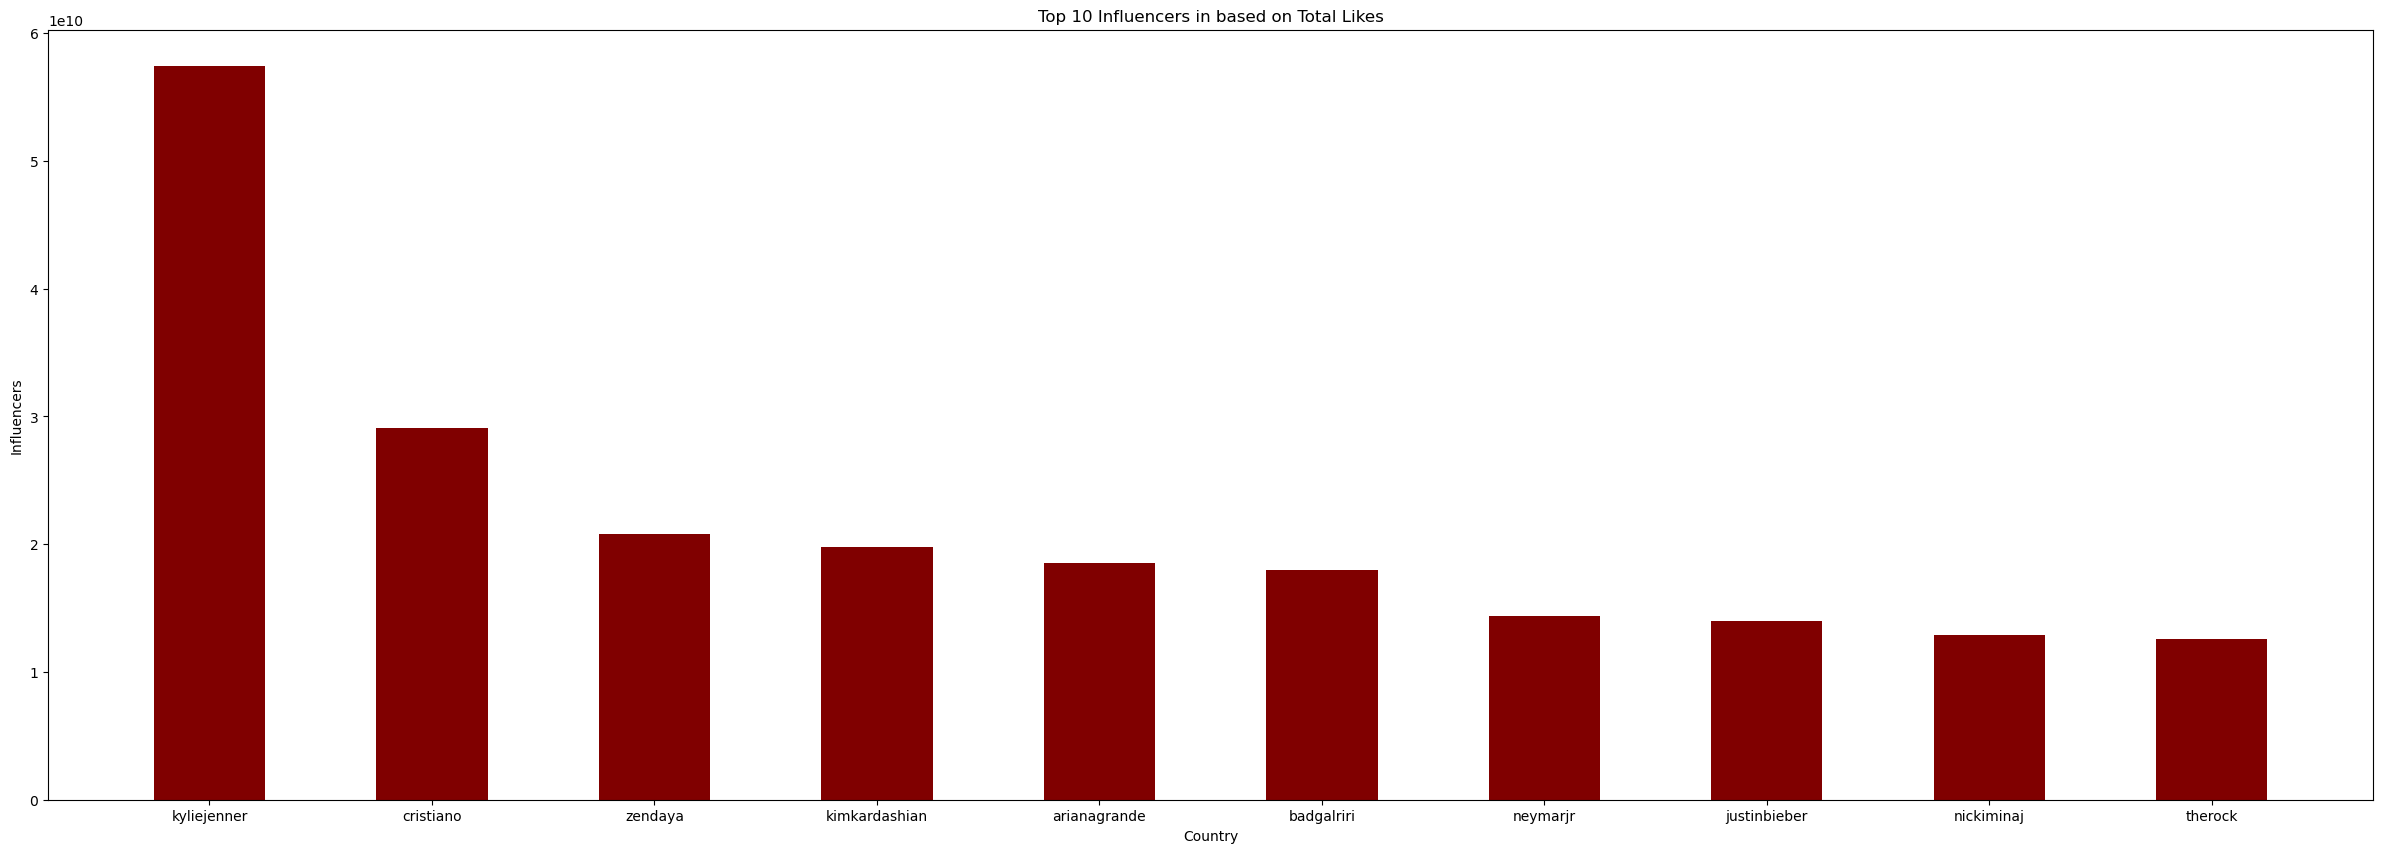

In [26]:
fig = plt.figure(figsize =(30, 10))
plt.bar(df4["Channel Info"],df4["Total Likes"],color ='maroon',width = 0.5)
plt.xlabel("Country")
plt.ylabel("Influencers")
plt.title("Top 10 Influencers in based on Total Likes")
plt.show()

### Q5:Describe the relationship between the following pairs of features using a suitable graph
● Followers and Total Likes
● Followers and Influence Score
● Posts and Average likes
● Posts and Influence Score

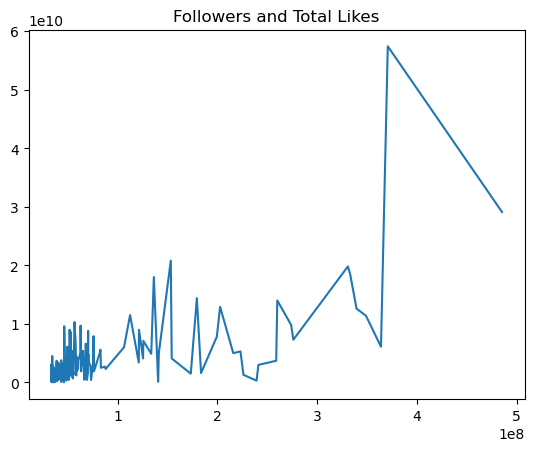

In [28]:
x=df["Followers"]
y=df["Total Likes"]
plt.plot(x,y)
plt.title("Followers and Total Likes")
plt.show()

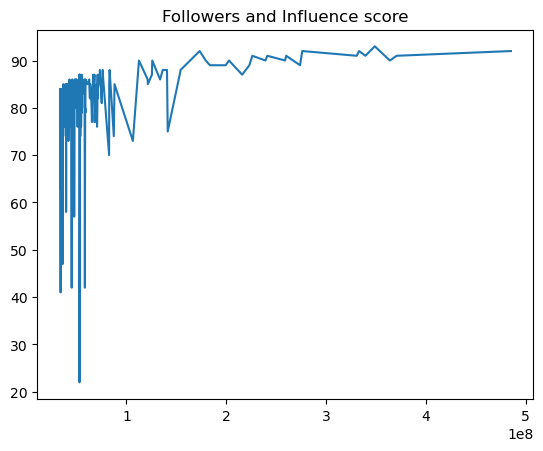

In [29]:
x=df["Followers"]
y=df["Influence Score"]
plt.plot(x,y)
plt.title("Followers and Influence score")
plt.show()

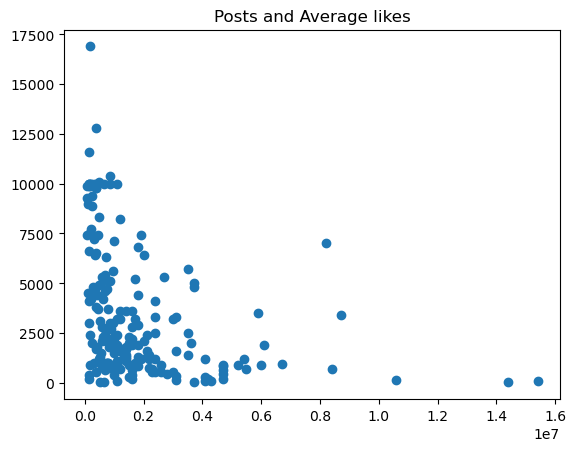

In [37]:
x=df["Posts"]
y=df["Avg. Likes"]
plt.scatter(y,x)
plt.title("Posts and Average likes")
plt.show()

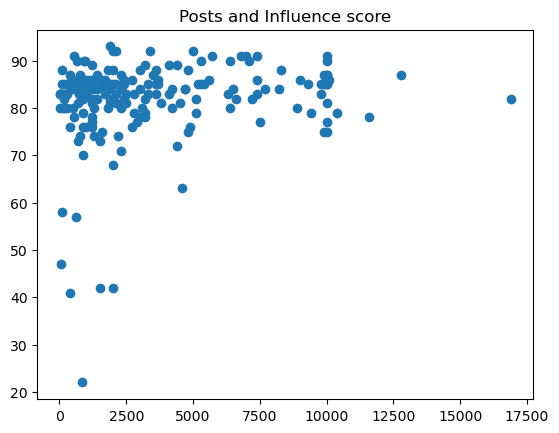

In [38]:
x=df["Posts"]
y=df["Influence Score"]
plt.scatter(x,y)
plt.title("Posts and Influence score")
plt.show()

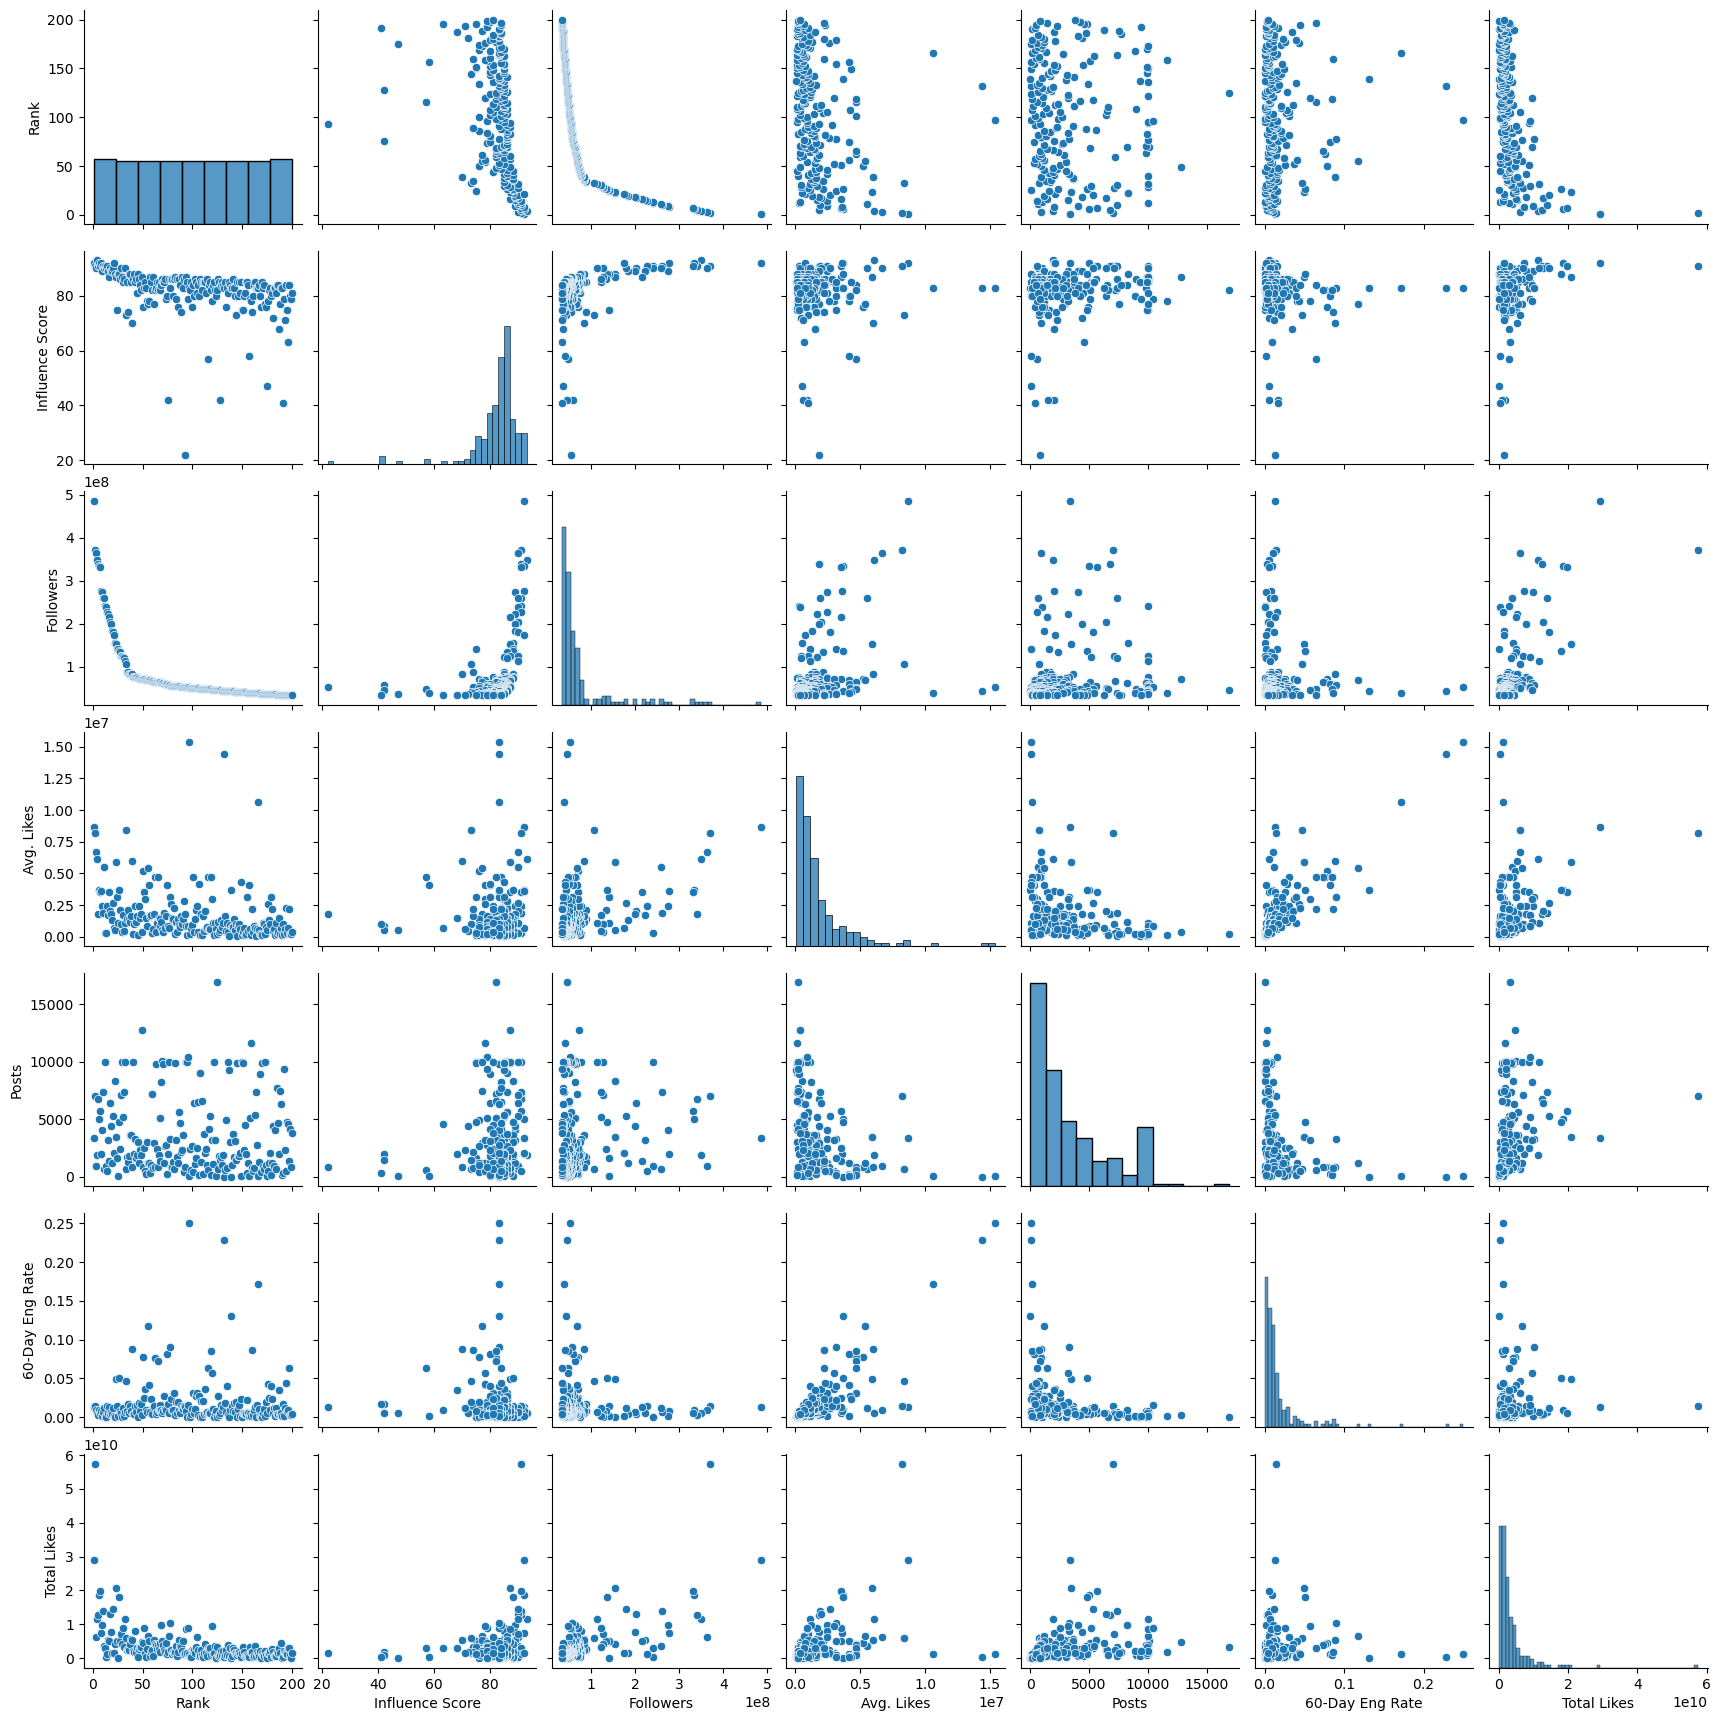

In [32]:
import seaborn as sns 
sns.pairplot(df)

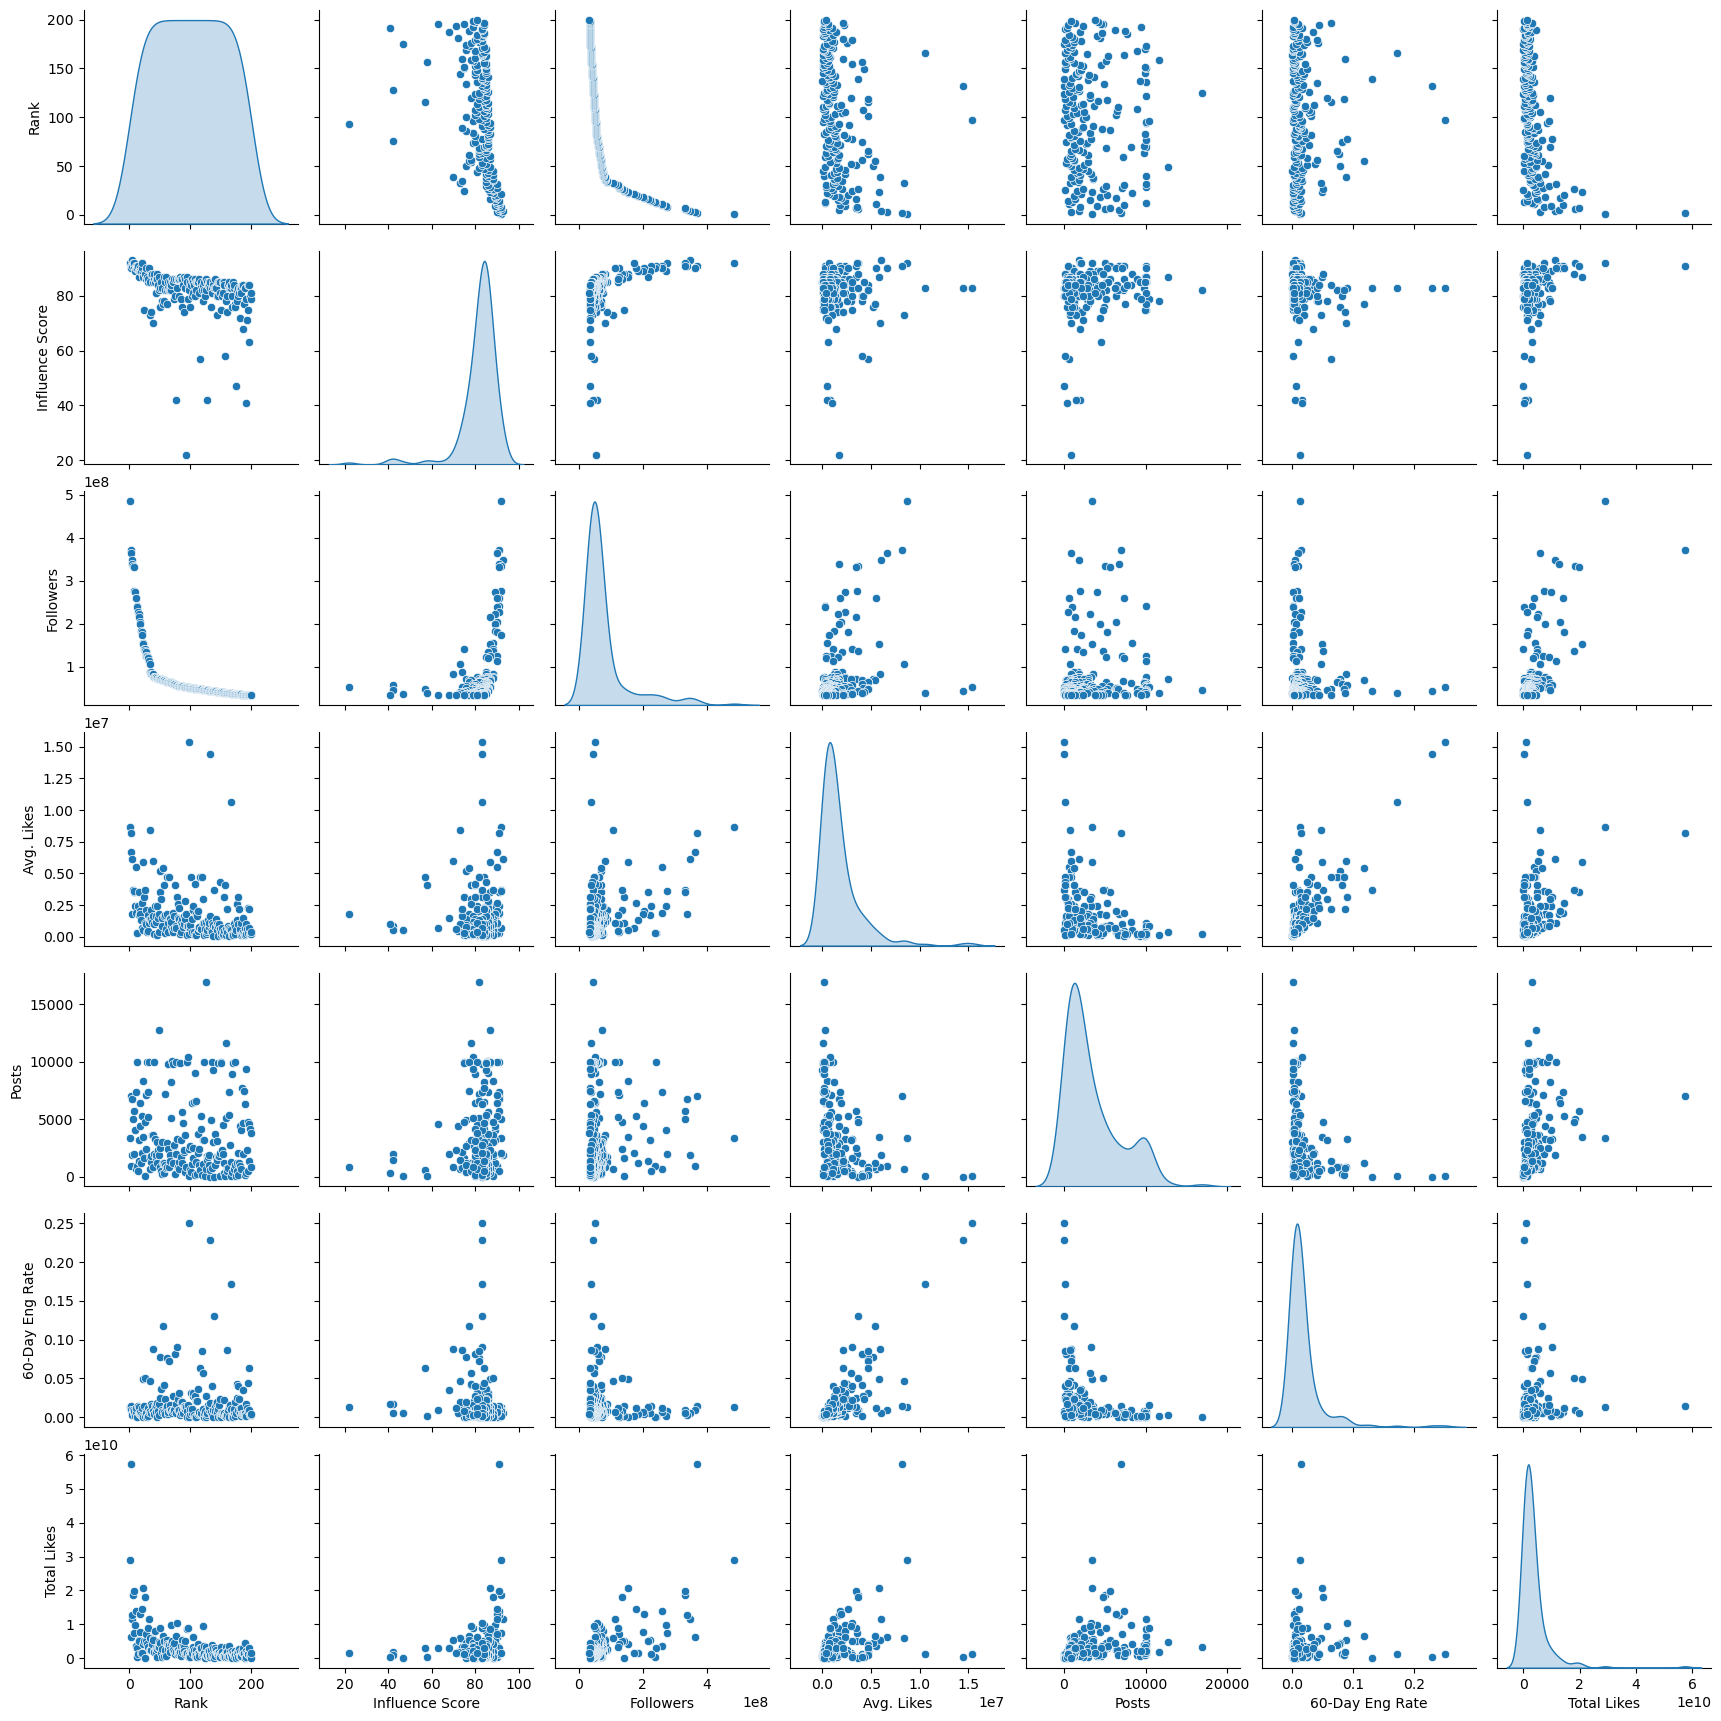

In [34]:
sns.pairplot(df, diag_kind="kde", markers="o")